In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_users = 1000
data = {
    'user_id': np.arange(1, num_users + 1),
    'login_frequency': np.random.randint(0, 30, size=num_users),  # Logins per month
    'activity_score': np.random.randint(0, 100, size=num_users),  # Activity score (0-100)
    'subscription_duration': np.random.randint(1, 36, size=num_users),  # Months subscribed
    'payment_amount': np.random.uniform(10, 50, size=num_users).round(2)  # Monthly payment
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_subscription_data.csv", index=False)

# Display the first 5 rows
print(df.head())

   user_id  login_frequency  activity_score  subscription_duration  \
0        1                6              16                     27   
1        2               19              84                     17   
2        3               28              77                     31   
3        4               14              72                     34   
4        5               10               0                     24   

   payment_amount  
0           44.48  
1           28.41  
2           39.97  
3           21.62  
4           41.48  


In [2]:
# Load dataset
df = pd.read_csv("synthetic_subscription_data.csv")

# Display first 5 rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   user_id  login_frequency  activity_score  subscription_duration  \
0        1                6              16                     27   
1        2               19              84                     17   
2        3               28              77                     31   
3        4               14              72                     34   
4        5               10               0                     24   

   payment_amount  
0           44.48  
1           28.41  
2           39.97  
3           21.62  
4           41.48  
user_id                  0
login_frequency          0
activity_score           0
subscription_duration    0
payment_amount           0
dtype: int64
           user_id  login_frequency  activity_score  subscription_duration  \
count  1000.000000      1000.000000     1000.000000            1000.000000   
mean    500.500000        14.940000       48.879000              18.096000   
std     288.819436         9.033493       29.121339              10.015343   

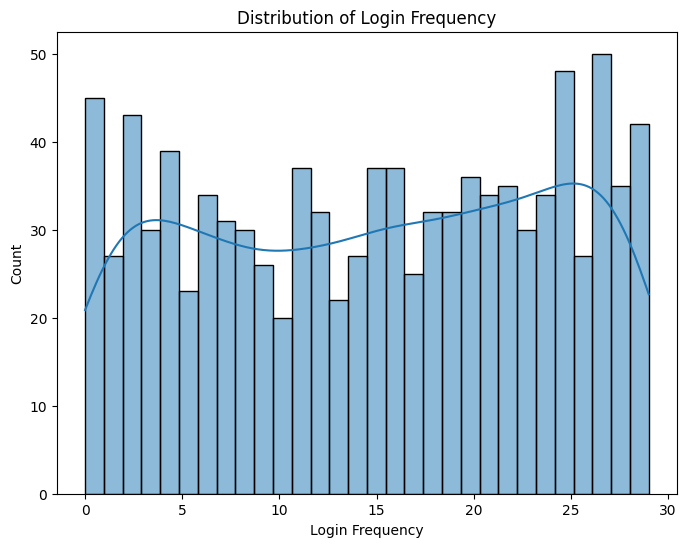

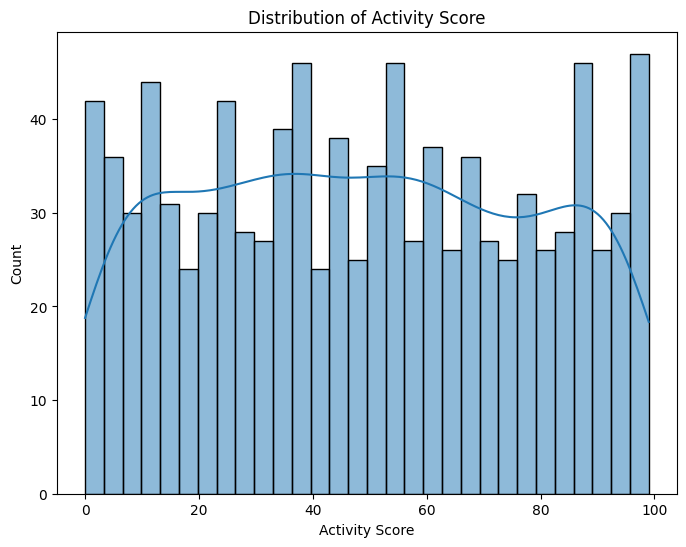

In [5]:
# Distribution of login frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['login_frequency'], bins=30, kde=True)
plt.title('Distribution of Login Frequency')
plt.xlabel('Login Frequency')
plt.ylabel('Count')
plt.show()

# Distribution of activity score
plt.figure(figsize=(8, 6))
sns.histplot(df['activity_score'], bins=30, kde=True)
plt.title('Distribution of Activity Score')
plt.xlabel('Activity Score')
plt.ylabel('Count')
plt.show()

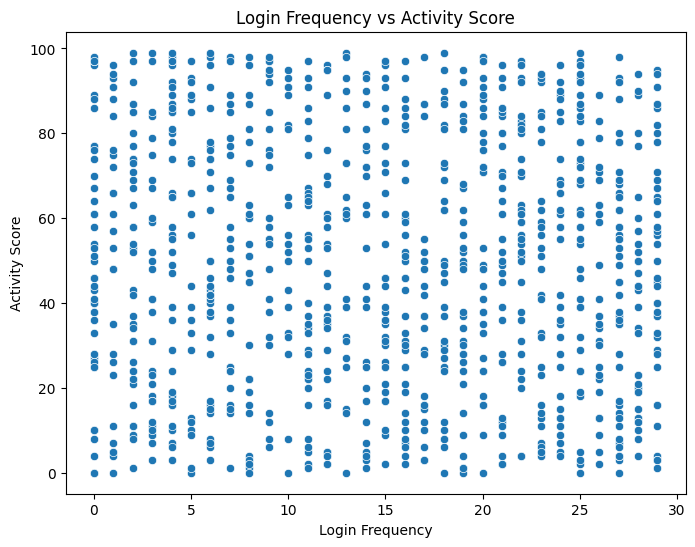

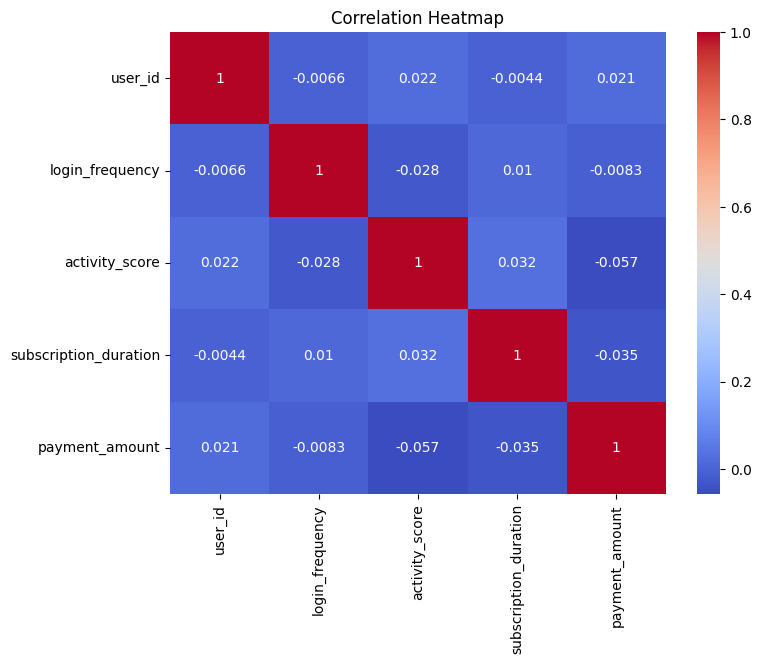

In [6]:
# Scatter plot: Login Frequency vs Activity Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='login_frequency', y='activity_score', data=df)
plt.title('Login Frequency vs Activity Score')
plt.xlabel('Login Frequency')
plt.ylabel('Activity Score')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

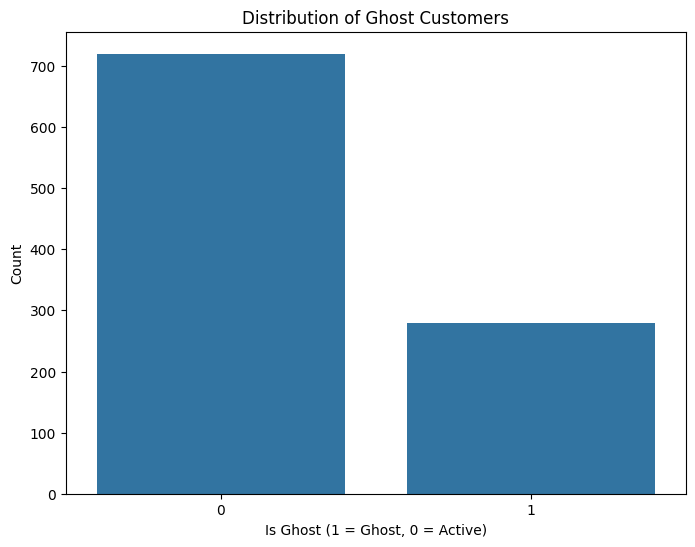

In [7]:
# Define ghost customers: Users with engagement_score below a threshold (e.g., 20)
df['engagement_score'] = df['login_frequency'] * 0.6 + df['activity_score'] * 0.4
df['is_ghost'] = np.where(df['engagement_score'] < 20, 1, 0)

# Distribution of target variable (is_ghost)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_ghost', data=df)
plt.title('Distribution of Ghost Customers')
plt.xlabel('Is Ghost (1 = Ghost, 0 = Active)')
plt.ylabel('Count')
plt.show()

In [8]:
# Handle missing values
df.fillna(0, inplace=True)

# Drop unnecessary columns
df = df.drop(['user_id'], axis=1)

# Split data into features and target
X = df.drop('is_ghost', axis=1)
y = df['is_ghost']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



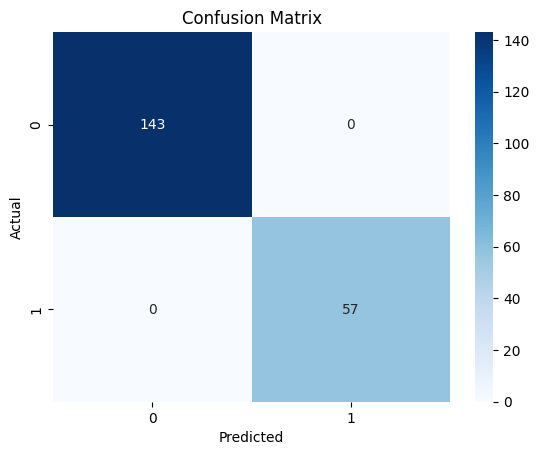

In [13]:
# Predict on test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Identify ghost customers
# Recreate 'is_ghost' column based on engagement_score (assuming the threshold is 20)
df['engagement_score'] = df['login_frequency'] * 0.6 + df['activity_score'] * 0.4
df['is_ghost'] = np.where(df['engagement_score'] < 20, 1, 0)

ghost_customers = df[df['is_ghost'] == 1]

# Recommend strategies
strategies = {
    "Discounts": "Offer 20% discount on next subscription renewal.",
    "Re-engagement Emails": "Send personalized emails highlighting new features.",
    "Feature Suggestions": "Recommend features based on user's past behavior."
}

for strategy, description in strategies.items():
    print(f"{strategy}: {description}")

Discounts: Offer 20% discount on next subscription renewal.
Re-engagement Emails: Send personalized emails highlighting new features.
Feature Suggestions: Recommend features based on user's past behavior.


In [17]:
# Save predictions to CSV
ghost_customers.to_csv("ghost_customers.csv", index=False)